In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.utils import to_categorical
from keras.optimizers import SGD, RMSprop, adadelta, Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

/home/praneet/envs/deeplearning/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_rows = 32
img_cols = 32
num_channels = 1
epochs = 50
num_classes = 10
batch_size = 16
NAME = "only_numbers_" + str(epochs)
directory = 'dataset/'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    zca_whitening=True,
    
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory, # same directory as training data
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    subset='validation') # set as validation data

/home/praneet/envs/deeplearning/lib/python3.5/site-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5040 images belonging to 10 classes.
Found 1260 images belonging to 10 classes.


In [4]:
tensorboard = TensorBoard(log_dir = 'logs/' + NAME)

In [5]:
augmented_checkpoint = ModelCheckpoint('models/augmented_best_model.h5',  # model filename
                                       monitor='val_loss',  # quantity to monitor
                                       verbose=1,  # verbosity - 0 or 1
                                       save_best_only=True,  # The latest best model will not be overwritten
                                       mode='auto')

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu', input_shape=(img_rows, img_rows, num_channels)))
model.add(Conv2D(64, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(Conv2D(128, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 128)         0         
__________

In [7]:
model.compile(loss=keras.losses.categorical_crossentropy,  # Better loss function for neural networks
              optimizer=Adam(lr=0.001, decay=1e-6),  # Adam optimizer with 1.0e-4 learning rate
              metrics=['accuracy'])  # Metrics to be evaluated by the model

In [8]:
history = model.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=epochs,
                    callbacks=[augmented_checkpoint, tensorboard],
                    verbose=1,
                    steps_per_epoch=64,
                    validation_steps=32,
)

Epoch 1/50


/home/praneet/envs/deeplearning/lib/python3.5/site-packages/keras_preprocessing/image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/praneet/envs/deeplearning/lib/python3.5/site-packages/keras_preprocessing/image.py:1150: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


64/64 [==============================] - 22s 341ms/step - loss: 1.6984 - acc: 0.3535 - val_loss: 0.7743 - val_acc: 0.7207

Epoch 00001: val_loss improved from inf to 0.77431, saving model to models/augmented_best_model.h5
Epoch 2/50
64/64 [==============================] - 22s 339ms/step - loss: 0.6644 - acc: 0.7549 - val_loss: 0.1895 - val_acc: 0.9512

Epoch 00002: val_loss improved from 0.77431 to 0.18947, saving model to models/augmented_best_model.h5
Epoch 3/50
64/64 [==============================] - 23s 352ms/step - loss: 0.2655 - acc: 0.9062 - val_loss: 0.1686 - val_acc: 0.9587

Epoch 00003: val_loss improved from 0.18947 to 0.16857, saving model to models/augmented_best_model.h5
Epoch 4/50
64/64 [==============================] - 23s 359ms/step - loss: 0.1807 - acc: 0.9355 - val_loss: 0.1298 - val_acc: 0.9570

Epoch 00004: val_loss improved from 0.16857 to 0.12980, saving model to models/augmented_best_model.h5
Epoch 5/50
64/64 [==============================] - 23s 357ms/step 

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("models/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/model.h5")
print("Saved model to disk")

Saved model to disk


In [10]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.preprocessing import image

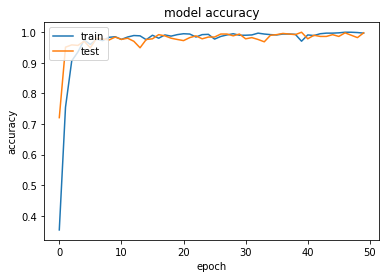

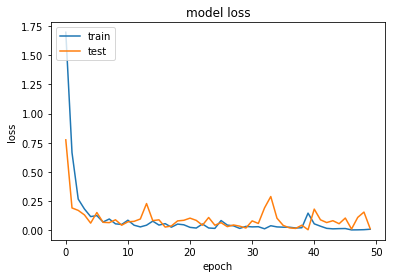

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

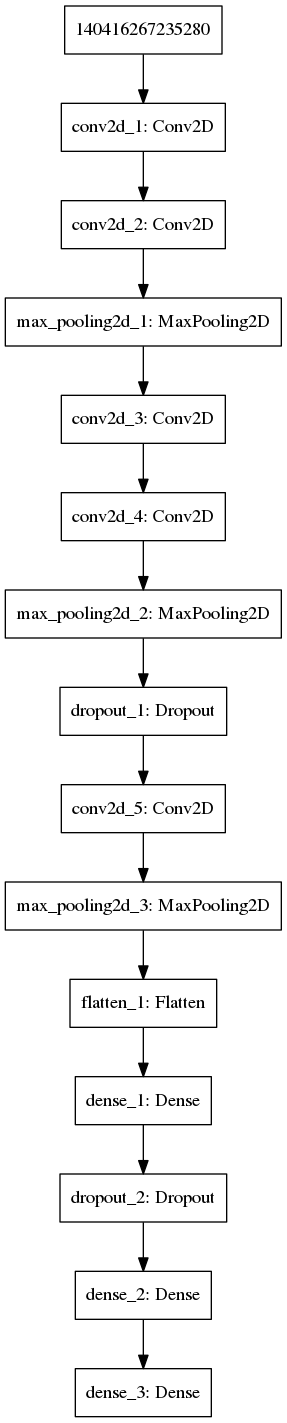

In [145]:
from keras.utils import plot_model
from PIL import Image

plot_model(model, to_file='model.png')
Image.open('model.png')

In [28]:
# img = cv2.imread('ignore/unnamed.jpg', 0)
# # img = cv2.resize(img, (600, 300))
# # img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 5)

# kernel_sharpening = np.array([[-1,-1,-1], 
#                               [-1, 9,-1],
#                               [-1,-1,-1]])
# img = cv2.GaussianBlur(img, (5, 5), 0)
# img = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,5)
# img = cv2.GaussianBlur(img, (5, 5), 0)
# img = cv2.filter2D(img, -1, kernel_sharpening)

# kernel = np.ones((5, 2), np.uint8)

# # test = cv2.morphologyEx(OBinary, cv2.MORPH_OPEN, kernel)
# test = cv2.dilate(img, kernel, iterations = 1)

# test = cv2.Canny(test, 30, 150)

# _, ctrs_line, _ = cv2.findContours(test.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# # sorted_ctrs_line = sorted(ctrs_line, key=lambda ctr: cv2.boundingRect(ctr)[0])
# # img = cv2.copyMakeBorder(img, 40, 40, 40, 40, cv2.BORDER_CONSTANT)
# # img = cv2.resize(img, (32, 32))
# cv2.imshow('test', test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# for i, ctr_line in enumerate(sorted_ctrs_line):
#     x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
#     if w_line * h_line < 200 or h_line < 20:
#         continue
# #     print(x_line, y_line, w_line, h_line)
#     cropped_line = img[y_line:y_line + h_line, x_line:x_line + w_line]
#     cropped_line = cv2.copyMakeBorder(cropped_line, 1,1,1,1,cv2.BORDER_CONSTANT)
#     cropped_line = cv2.resize(cropped_line, (32, 32))
#     cropped_line = cv2.copyMakeBorder(cropped_line, 2,2,2,2,cv2.BORDER_CONSTANT)
#     cropped_line = cv2.resize(cropped_line, (32, 32))
#     cv2.imshow('test', cropped_line)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     output = model.predict_classes(cropped_line.reshape(-1, 32, 32, 1))
#     print(output)

# # for i, ctr_line in enumerate(sorted_ctrs_line):
# #     # getting coordinates of the line contour
# #     x_line, y_line, w_line, h_line = cv2.boundingRect(ctr_line)
    
# #     cv2.imshow('test', img)
# #     cv2.waitKey(0)
# #     cv2.destroyAllWindows()

# cv2.destroyAllWindows()


# # output = model.predict_classes(img.reshape(-1, 32, 32, 1))
# # print(output)

[0]
[0]
[3]
[6]
[3]


In [8]:
from keras.models import load_model
import cv2

In [3]:
# json_file = open('ocr_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# # load weights into new model
# model.load_weights("ocr_weights.h5")

model = load_model('models/augmented_best_model.h5')

In [5]:
m

In [23]:
img = cv2.imread('ignore/five', 0)
_, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
img = cv2.copyMakeBorder(img, 40, 40 ,40, 40,cv2.BORDER_CONSTANT)
img = cv2.resize(img, (32, 32))
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
output = model.predict_classes(img.reshape(-1, 32, 32, 1))
print(output)

[6]
